In [2]:
loc = "C:\\Users\\sabar\\Downloads\\final.csv"

Training Accuracy: 1.0
Testing Accuracy: 0.7984476067270375
Predicted Outcome: False


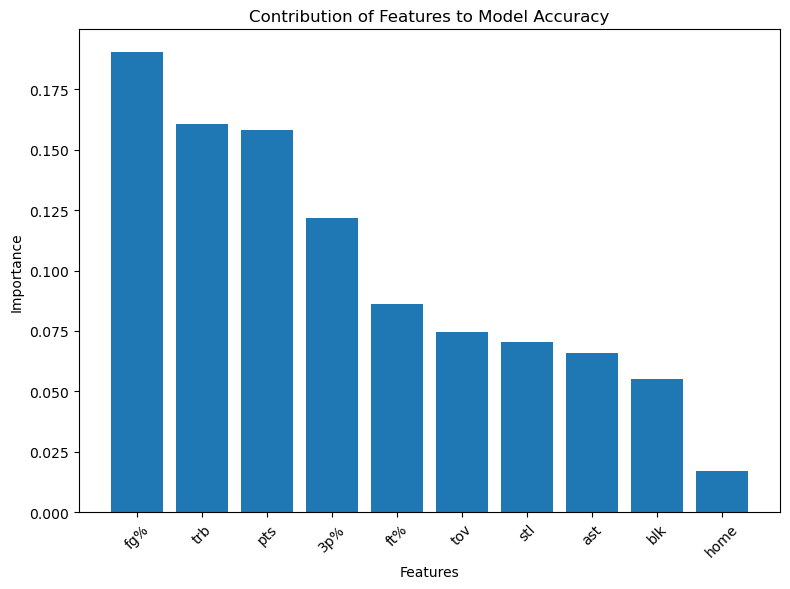

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data_path = "C:\\Users\\sabar\\Downloads\\final.csv"
df = pd.read_csv(data_path, index_col=0)

# Select the top ten features and the target variable
selected_features = ['pts', 'fg%', '3p%', 'ft%', 'trb', 'ast', 'stl', 'blk', 'tov', 'home']
target_variable = 'won'

# Prepare the data
X = df[selected_features]
y = df[target_variable]

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# CUI for predicting game outcomes
def predict_game_outcome(team1, team2, date, home_game):
    # Preprocess the input data to match the model's format
    input_data = pd.DataFrame([[0] * len(selected_features)], columns=selected_features)
    input_data['pts'] = team1['pts'] - team2['pts']
    input_data['fg%'] = team1['fg%'] - team2['fg%']
    input_data['3p%'] = team1['3p%'] - team2['3p%']
    input_data['ft%'] = team1['ft%'] - team2['ft%']
    input_data['trb'] = team1['trb'] - team2['trb']
    input_data['ast'] = team1['ast'] - team2['ast']
    input_data['stl'] = team1['stl'] - team2['stl']
    input_data['blk'] = team1['blk'] - team2['blk']
    input_data['tov'] = team1['tov'] - team2['tov']
    input_data['home'] = 1 if home_game else 0
    
    # Predict the game outcome
    outcome = model.predict(input_data)
    outcome_label = le.inverse_transform(outcome)[0]
    
    return outcome_label


team1_stats = df[df['team'] == 'LAL'].iloc[0]
team2_stats = df[df['team'] == 'DEN'].iloc[0]
date = '2023-05-22'
home_game = True

predicted_outcome = predict_game_outcome(team1_stats, team2_stats, date, home_game)
print("Predicted Outcome:", predicted_outcome)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame to store feature importances
df_feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
df_feature_importances.sort_values('Importance', ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.bar(df_feature_importances['Feature'], df_feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Contribution of Features to Model Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have already trained and obtained the model predictions
y_true_train = model.predict(X_train)
y_true_test = model.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_true_train)
test_accuracy = accuracy_score(y_test, y_true_test)
precision = precision_score(y_test, y_true_test)
recall = recall_score(y_test, y_true_test)
f1 = f1_score(y_test, y_true_test)

# Create a DataFrame to display the metrics
metrics_data = {'Metric': ['Training Accuracy', 'Testing Accuracy', 'Precision', 'Recall', 'F1-Score'],
                'Value': [train_accuracy, test_accuracy, precision, recall, f1]}
metrics_df = pd.DataFrame(metrics_data)

# Beautify the output
metrics_df_styled = metrics_df.style.format({'Value': "{:.2%}"})

# Display the metrics DataFrame
metrics_df_styled
